<a href="https://colab.research.google.com/github/jsalafica/Data-Science-I/blob/master/Clase_6/eda_analisis_riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import pandas as pd
from glob import glob

In [25]:
csv_files = glob("/content/drive/MyDrive/acciones/*.csv")

In [26]:
csv_files

['/content/drive/MyDrive/acciones/D.csv',
 '/content/drive/MyDrive/acciones/DUK.csv',
 '/content/drive/MyDrive/acciones/EXC.csv',
 '/content/drive/MyDrive/acciones/NEE.csv',
 '/content/drive/MyDrive/acciones/SO.csv']

In [27]:
matched_file_names = {os.path.basename(file).replace(".csv",""): file for file in csv_files}
matched_file_names

{'D': '/content/drive/MyDrive/acciones/D.csv',
 'DUK': '/content/drive/MyDrive/acciones/DUK.csv',
 'EXC': '/content/drive/MyDrive/acciones/EXC.csv',
 'NEE': '/content/drive/MyDrive/acciones/NEE.csv',
 'SO': '/content/drive/MyDrive/acciones/SO.csv'}

Mapeo de valores para agregado a los valores de las acciones

In [28]:
symbols_map = {
    "D": "Dominion Energy Inc.",
    "EXC": "Exelon Corp.",
    "NEE": "NextEra Energy Inc.",
    "SO": "Southern Co.",
    "DUK": "Duke Energy Corp."
}

In [29]:
final_dataframe = []

for symbol_name, path_csv in matched_file_names.items():
    df = pd.read_csv(path_csv, sep=",")
    df["name"] = symbols_map[symbol_name]
    final_dataframe.append(df)

final_dataframe = pd.concat(final_dataframe).reset_index()

In [30]:
final_dataframe.sample(10)

,index,Date,Open,High,Low,Close,Adj Close,Volume,name
3334,816,2017-10-20,39.750000,39.810001,39.340000,39.580002,37.420021,4235600,Exelon Corp.
3651,1133,2019-01-28,46.470001,46.570000,45.810001,46.150002,45.469139,3555600,Exelon Corp.
5858,822,2017-10-30,52.040001,52.169998,51.830002,52.090000,47.725945,3346000,Southern Co.
4931,1154,2019-02-27,186.580002,187.490005,186.080002,186.809998,185.636215,1822000,NextEra Energy Inc.
1703,444,2016-05-02,78.830002,79.629997,78.680000,78.940002,68.600044,2990200,Duke Energy Corp.
4256,479,2016-06-21,124.540001,124.970001,123.570000,124.269997,113.626022,1860100,NextEra Energy Inc.
5584,548,2016-09-28,52.950001,53.020000,52.509998,52.700001,46.073097,5819700,Southern Co.
2223,964,2018-05-24,74.870003,75.800003,74.639999,75.739998,72.527809,4162700,Duke Energy Corp.
5935,899,2018-02-21,43.580002,43.849998,42.910000,42.919998,40.292736,8576300,Southern Co.
1234,1234,2019-06-21,77.660004,78.440002,76.709999,78.349998,78.349998,8070500,Dominion Energy Inc.



Solución Completa: Cálculo de Volatilidad y Retorno + Gráficos

    Calcular la volatilidad relativa ((High - Low) / Open)
    Calcular el retorno ((Close / Open) - 1)
    Graficar ambas métricas para comparar acciones.
    Identificar la mejor inversión (balance entre alto retorno y baja volatilidad).



In [31]:
# Calculamos volatilidad y retorno
# volatilidad relativa ->  indicador de volatilidad que mide la variación de los precios de un activo financiero en un periodo de tiempo, usando la desviación estándar de los precios
final_dataframe["volatilidad_relativa"] = (final_dataframe["High"] - final_dataframe["Low"]) / final_dataframe["Open"]

# Retorno ->
final_dataframe["retorno"] = (final_dataframe["Close"] / final_dataframe["Open"]) - 1

# Agrupamos por acción (name) y calculamos el promedio
metricas_por_accion = final_dataframe.groupby("name").agg({
    "volatilidad_relativa": "mean",
    "retorno": "mean"
}).reset_index()

print(metricas_por_accion)

                   name  volatilidad_relativa   retorno
0  Dominion Energy Inc.              0.014836  0.000339
1     Duke Energy Corp.              0.014534  0.000307
2          Exelon Corp.              0.017722  0.000368
3   NextEra Energy Inc.              0.014881  0.000700
4          Southern Co.              0.014065  0.000595


Graficos comparativos
Volatilidad vs Retorno

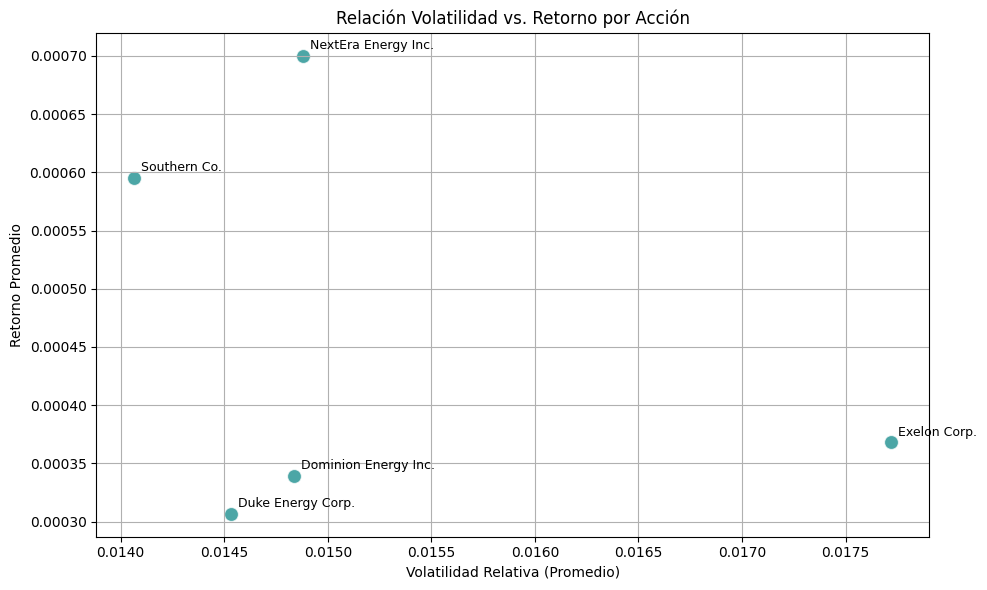

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el scatterplot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=metricas_por_accion,
    x="volatilidad_relativa",
    y="retorno",
    s=100,
    alpha=0.7,
    color="teal"
)

# Etiquetas y título
plt.xlabel("Volatilidad Relativa (Promedio)")
plt.ylabel("Retorno Promedio")
plt.title("Relación Volatilidad vs. Retorno por Acción")

# Agregar etiquetas con nombres
for i, row in metricas_por_accion.iterrows():
    plt.annotate(
        row["name"],
        (row["volatilidad_relativa"], row["retorno"]),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left',
        fontsize=9
    )

plt.tight_layout()
plt.grid(True)
plt.show()

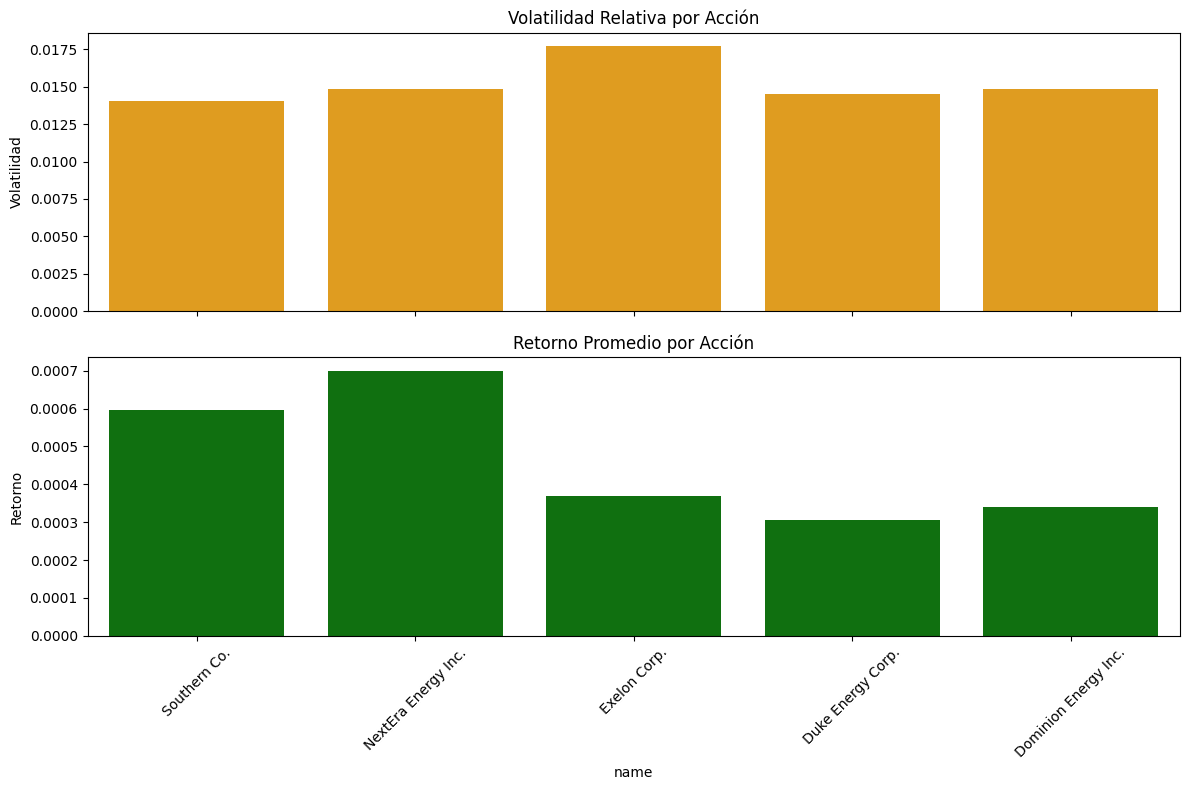

In [33]:
# Ordenar los datos por nombre
df_ordenado = metricas_por_accion.sort_values("name", ascending=False)

# Crear figura con 2 subplots (uno encima del otro)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Volatilidad relativa
sns.barplot(
    data=df_ordenado,
    x="name", y="volatilidad_relativa",
    color="orange",
    ax=axes[0]
)
axes[0].set_title("Volatilidad Relativa por Acción")
axes[0].set_ylabel("Volatilidad")
axes[0].tick_params(axis='x', rotation=45)

# Retorno promedio
sns.barplot(
    data=df_ordenado,
    x="name", y="retorno",
    color="green",
    ax=axes[1]
)
axes[1].set_title("Retorno Promedio por Acción")
axes[1].set_ylabel("Retorno")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()